In [32]:
import os
from nltk import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
with open(os.path.join("data", "texto.txt"), "r", encoding="utf-8") as file:
    texto = file.read()
texto

'Ainda pior que a convicção do não e a incerteza do talvez é a desilusão de um quase. \nÉ o quase que me incomoda, que me entristece, que me mata trazendo tudo que poderia ter \nsido e não foi. Quem quase ganhou ainda joga, quem quase passou ainda estuda, \nquem quase morreu está vivo, quem quase amou não amou. \nBasta pensar nas oportunidades que escaparam pelos dedos, nas chances que se perdem por medo, \nnas ideias que nunca sairão do papel por essa maldita mania de viver no outono python. '

In [6]:
texto_full = " ".join(texto.splitlines())
texto_full

'Ainda pior que a convicção do não e a incerteza do talvez é a desilusão de um quase.  É o quase que me incomoda, que me entristece, que me mata trazendo tudo que poderia ter  sido e não foi. Quem quase ganhou ainda joga, quem quase passou ainda estuda,  quem quase morreu está vivo, quem quase amou não amou.  Basta pensar nas oportunidades que escaparam pelos dedos, nas chances que se perdem por medo,  nas ideias que nunca sairão do papel por essa maldita mania de viver no outono python. '

In [8]:
sent_tokens = sent_tokenize(texto_full)
sent_tokens

['Ainda pior que a convicção do não e a incerteza do talvez é a desilusão de um quase.',
 'É o quase que me incomoda, que me entristece, que me mata trazendo tudo que poderia ter  sido e não foi.',
 'Quem quase ganhou ainda joga, quem quase passou ainda estuda,  quem quase morreu está vivo, quem quase amou não amou.',
 'Basta pensar nas oportunidades que escaparam pelos dedos, nas chances que se perdem por medo,  nas ideias que nunca sairão do papel por essa maldita mania de viver no outono python.']

In [23]:
word_tokens = word_tokenize(texto_full.lower())
word_tokens

['ainda',
 'pior',
 'que',
 'a',
 'convicção',
 'do',
 'não',
 'e',
 'a',
 'incerteza',
 'do',
 'talvez',
 'é',
 'a',
 'desilusão',
 'de',
 'um',
 'quase',
 '.',
 'é',
 'o',
 'quase',
 'que',
 'me',
 'incomoda',
 ',',
 'que',
 'me',
 'entristece',
 ',',
 'que',
 'me',
 'mata',
 'trazendo',
 'tudo',
 'que',
 'poderia',
 'ter',
 'sido',
 'e',
 'não',
 'foi',
 '.',
 'quem',
 'quase',
 'ganhou',
 'ainda',
 'joga',
 ',',
 'quem',
 'quase',
 'passou',
 'ainda',
 'estuda',
 ',',
 'quem',
 'quase',
 'morreu',
 'está',
 'vivo',
 ',',
 'quem',
 'quase',
 'amou',
 'não',
 'amou',
 '.',
 'basta',
 'pensar',
 'nas',
 'oportunidades',
 'que',
 'escaparam',
 'pelos',
 'dedos',
 ',',
 'nas',
 'chances',
 'que',
 'se',
 'perdem',
 'por',
 'medo',
 ',',
 'nas',
 'ideias',
 'que',
 'nunca',
 'sairão',
 'do',
 'papel',
 'por',
 'essa',
 'maldita',
 'mania',
 'de',
 'viver',
 'no',
 'outono',
 'python',
 '.']

In [10]:
len(word_tokens)

101

In [12]:
fdist = FreqDist(word_tokens)
fdist

FreqDist({'que': 8, ',': 7, 'quase': 6, '.': 4, 'a': 3, 'do': 3, 'não': 3, 'me': 3, 'quem': 3, 'nas': 3, ...})

In [14]:
fdist.most_common(10)

[('que', 8),
 (',', 7),
 ('quase', 6),
 ('.', 4),
 ('a', 3),
 ('do', 3),
 ('não', 3),
 ('me', 3),
 ('quem', 3),
 ('nas', 3)]

In [19]:
stop_words = set(stopwords.words('portuguese'))

In [24]:
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]
filtered_words

['ainda',
 'pior',
 'convicção',
 'incerteza',
 'talvez',
 'desilusão',
 'quase',
 'quase',
 'incomoda',
 'entristece',
 'mata',
 'trazendo',
 'tudo',
 'poderia',
 'ter',
 'sido',
 'quase',
 'ganhou',
 'ainda',
 'joga',
 'quase',
 'passou',
 'ainda',
 'estuda',
 'quase',
 'morreu',
 'vivo',
 'quase',
 'amou',
 'amou',
 'basta',
 'pensar',
 'oportunidades',
 'escaparam',
 'dedos',
 'chances',
 'perdem',
 'medo',
 'ideias',
 'nunca',
 'sairão',
 'papel',
 'maldita',
 'mania',
 'viver',
 'outono',
 'python']

In [21]:
len(filtered_words)

49

In [25]:
fdist2 = FreqDist(filtered_words)
fdist2.most_common(5)

[('quase', 6), ('ainda', 3), ('amou', 2), ('pior', 1), ('convicção', 1)]

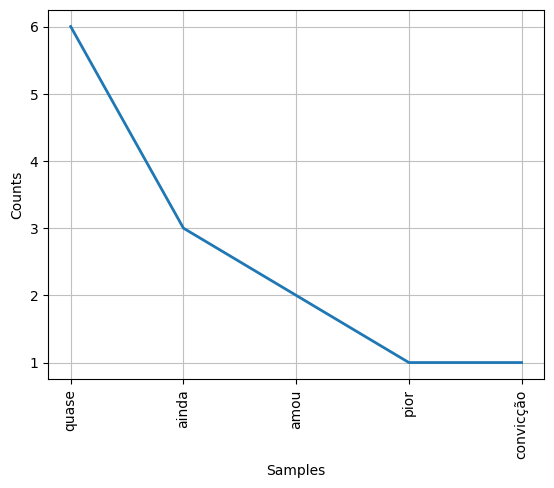

<Axes: xlabel='Samples', ylabel='Counts'>

In [28]:
fdist2.plot(5)

In [29]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [30]:
wc = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='salmon',
    colormap='Pastel1',
    collocations=False,
    stopwords=STOPWORDS
)
wc.generate(texto_full)

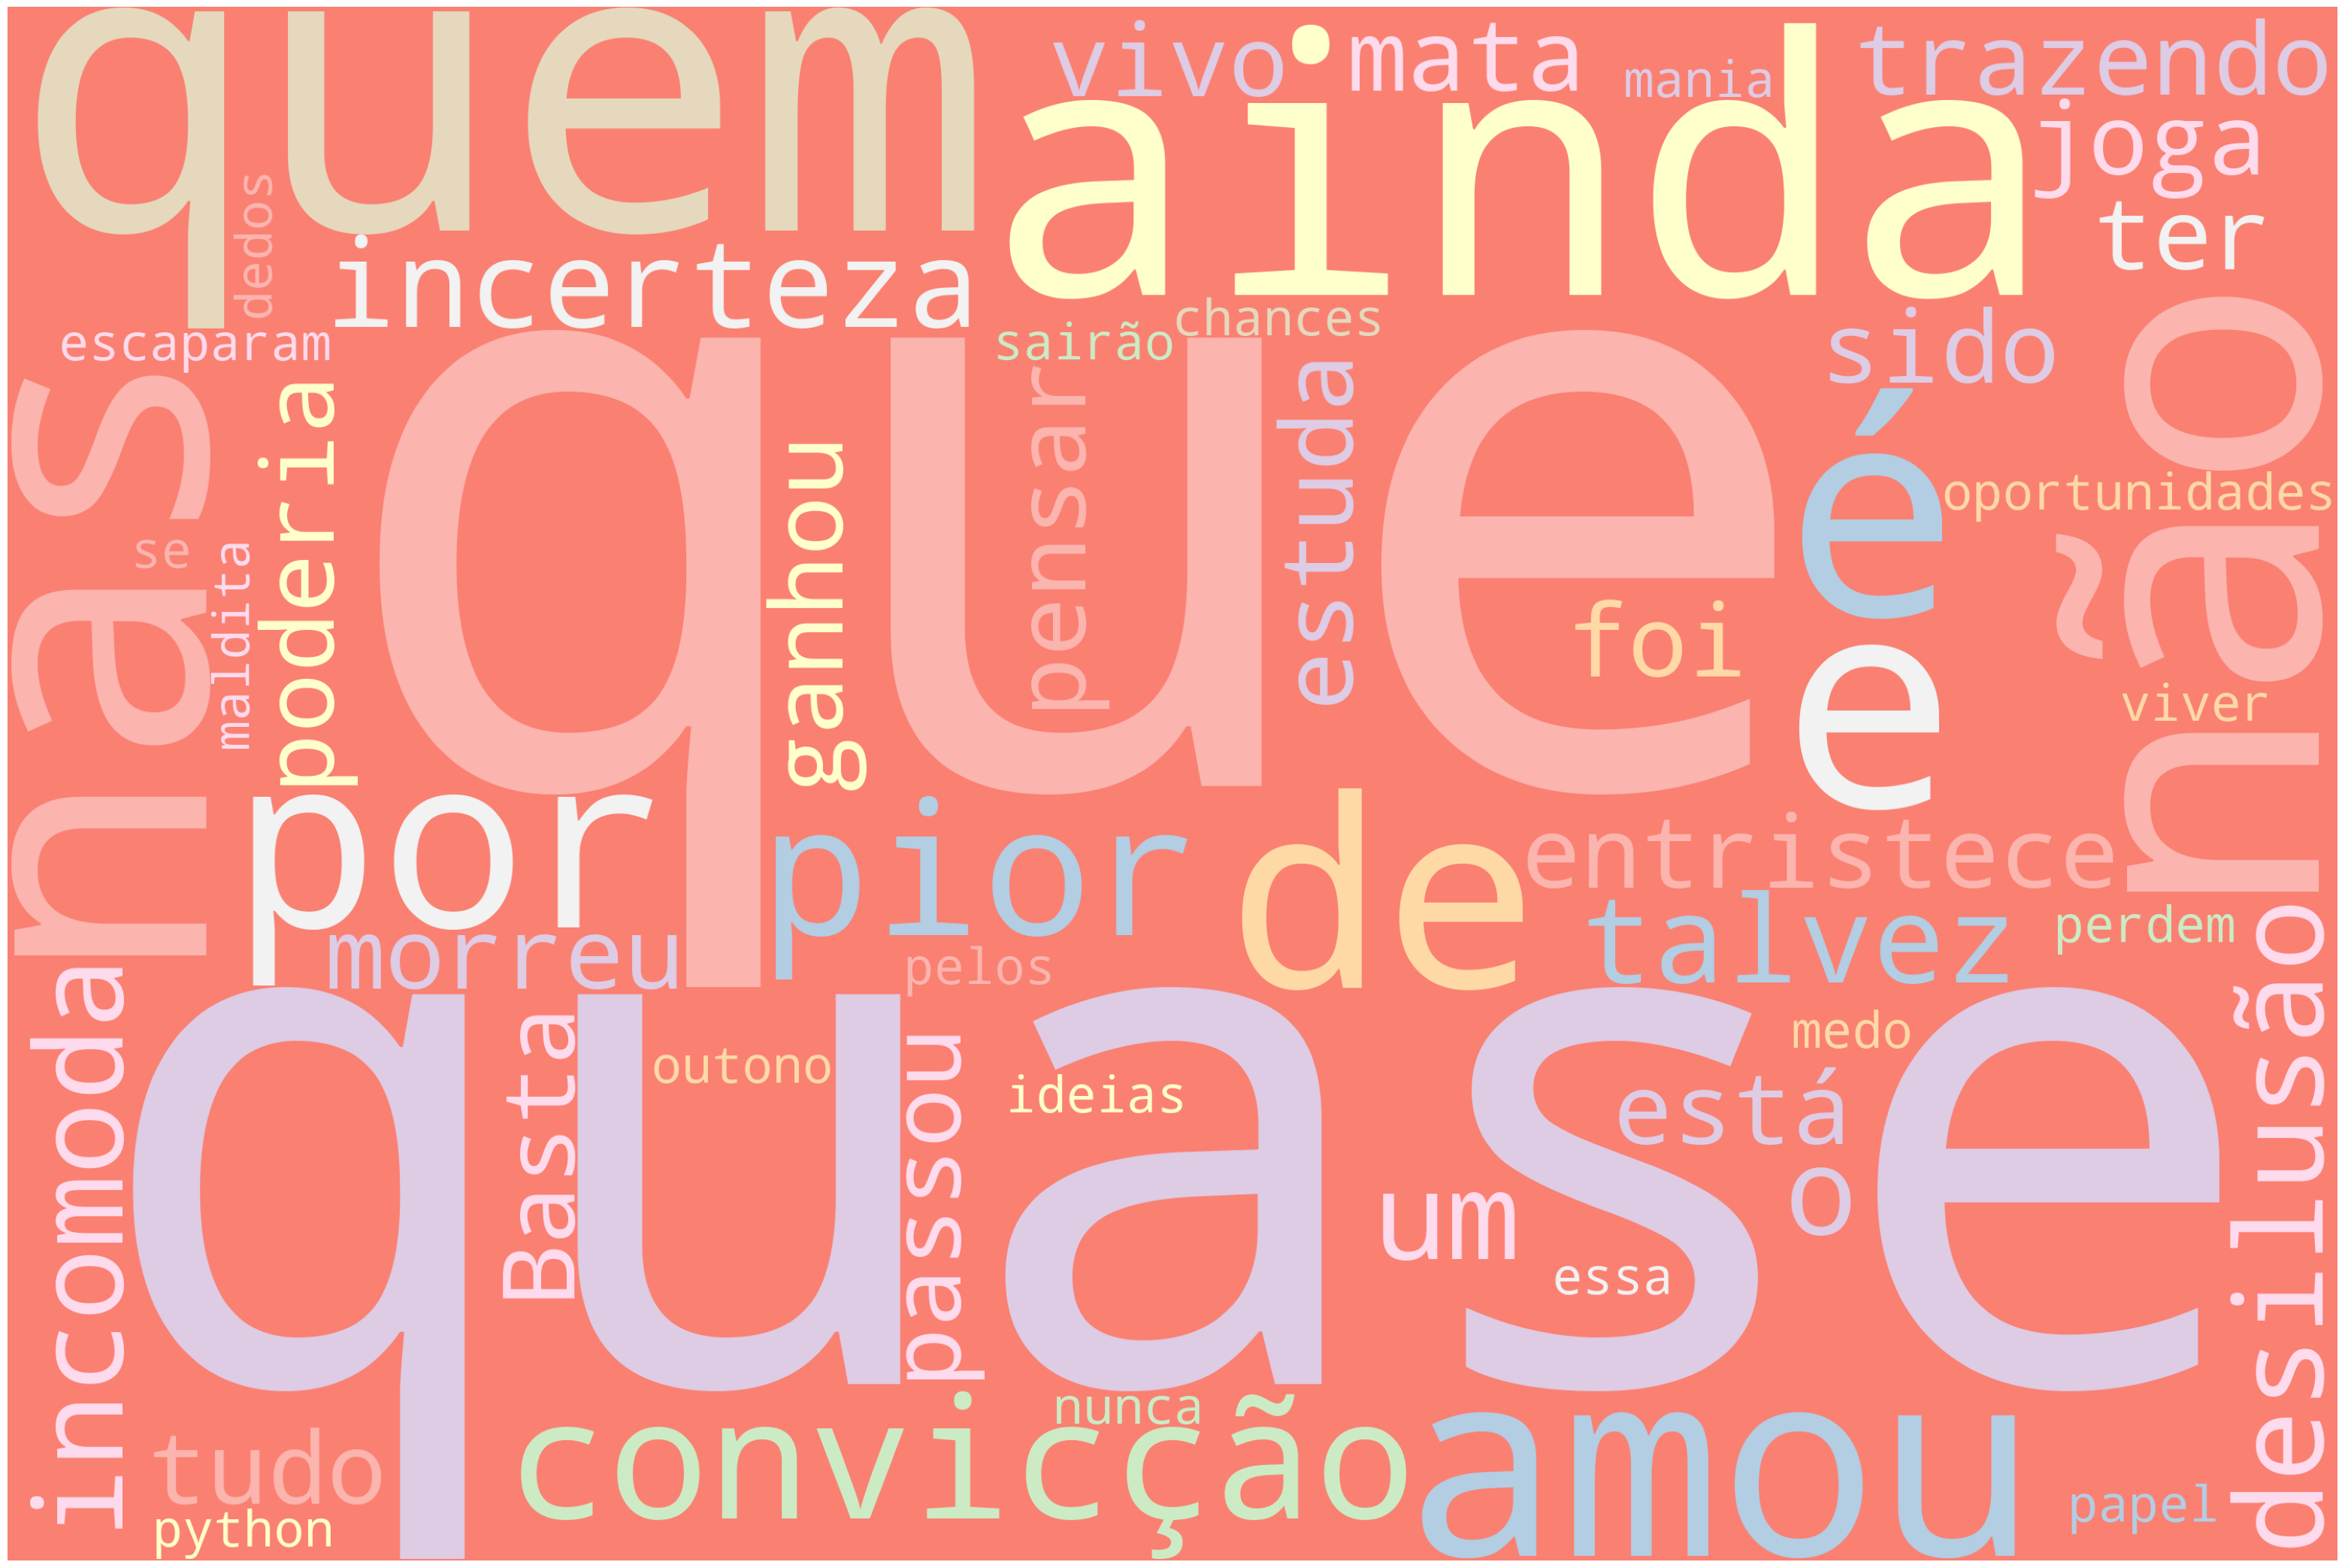

In [31]:
plot_cloud(wc)

In [33]:
mascara = np.array(Image.open("data/upvote.png"))
mascara

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [36]:
wc2 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='salmon',
    colormap='Pastel1',
    collocations=False,
    stopwords=STOPWORDS,
    mask=mascara
)
wc2.generate(texto_full)

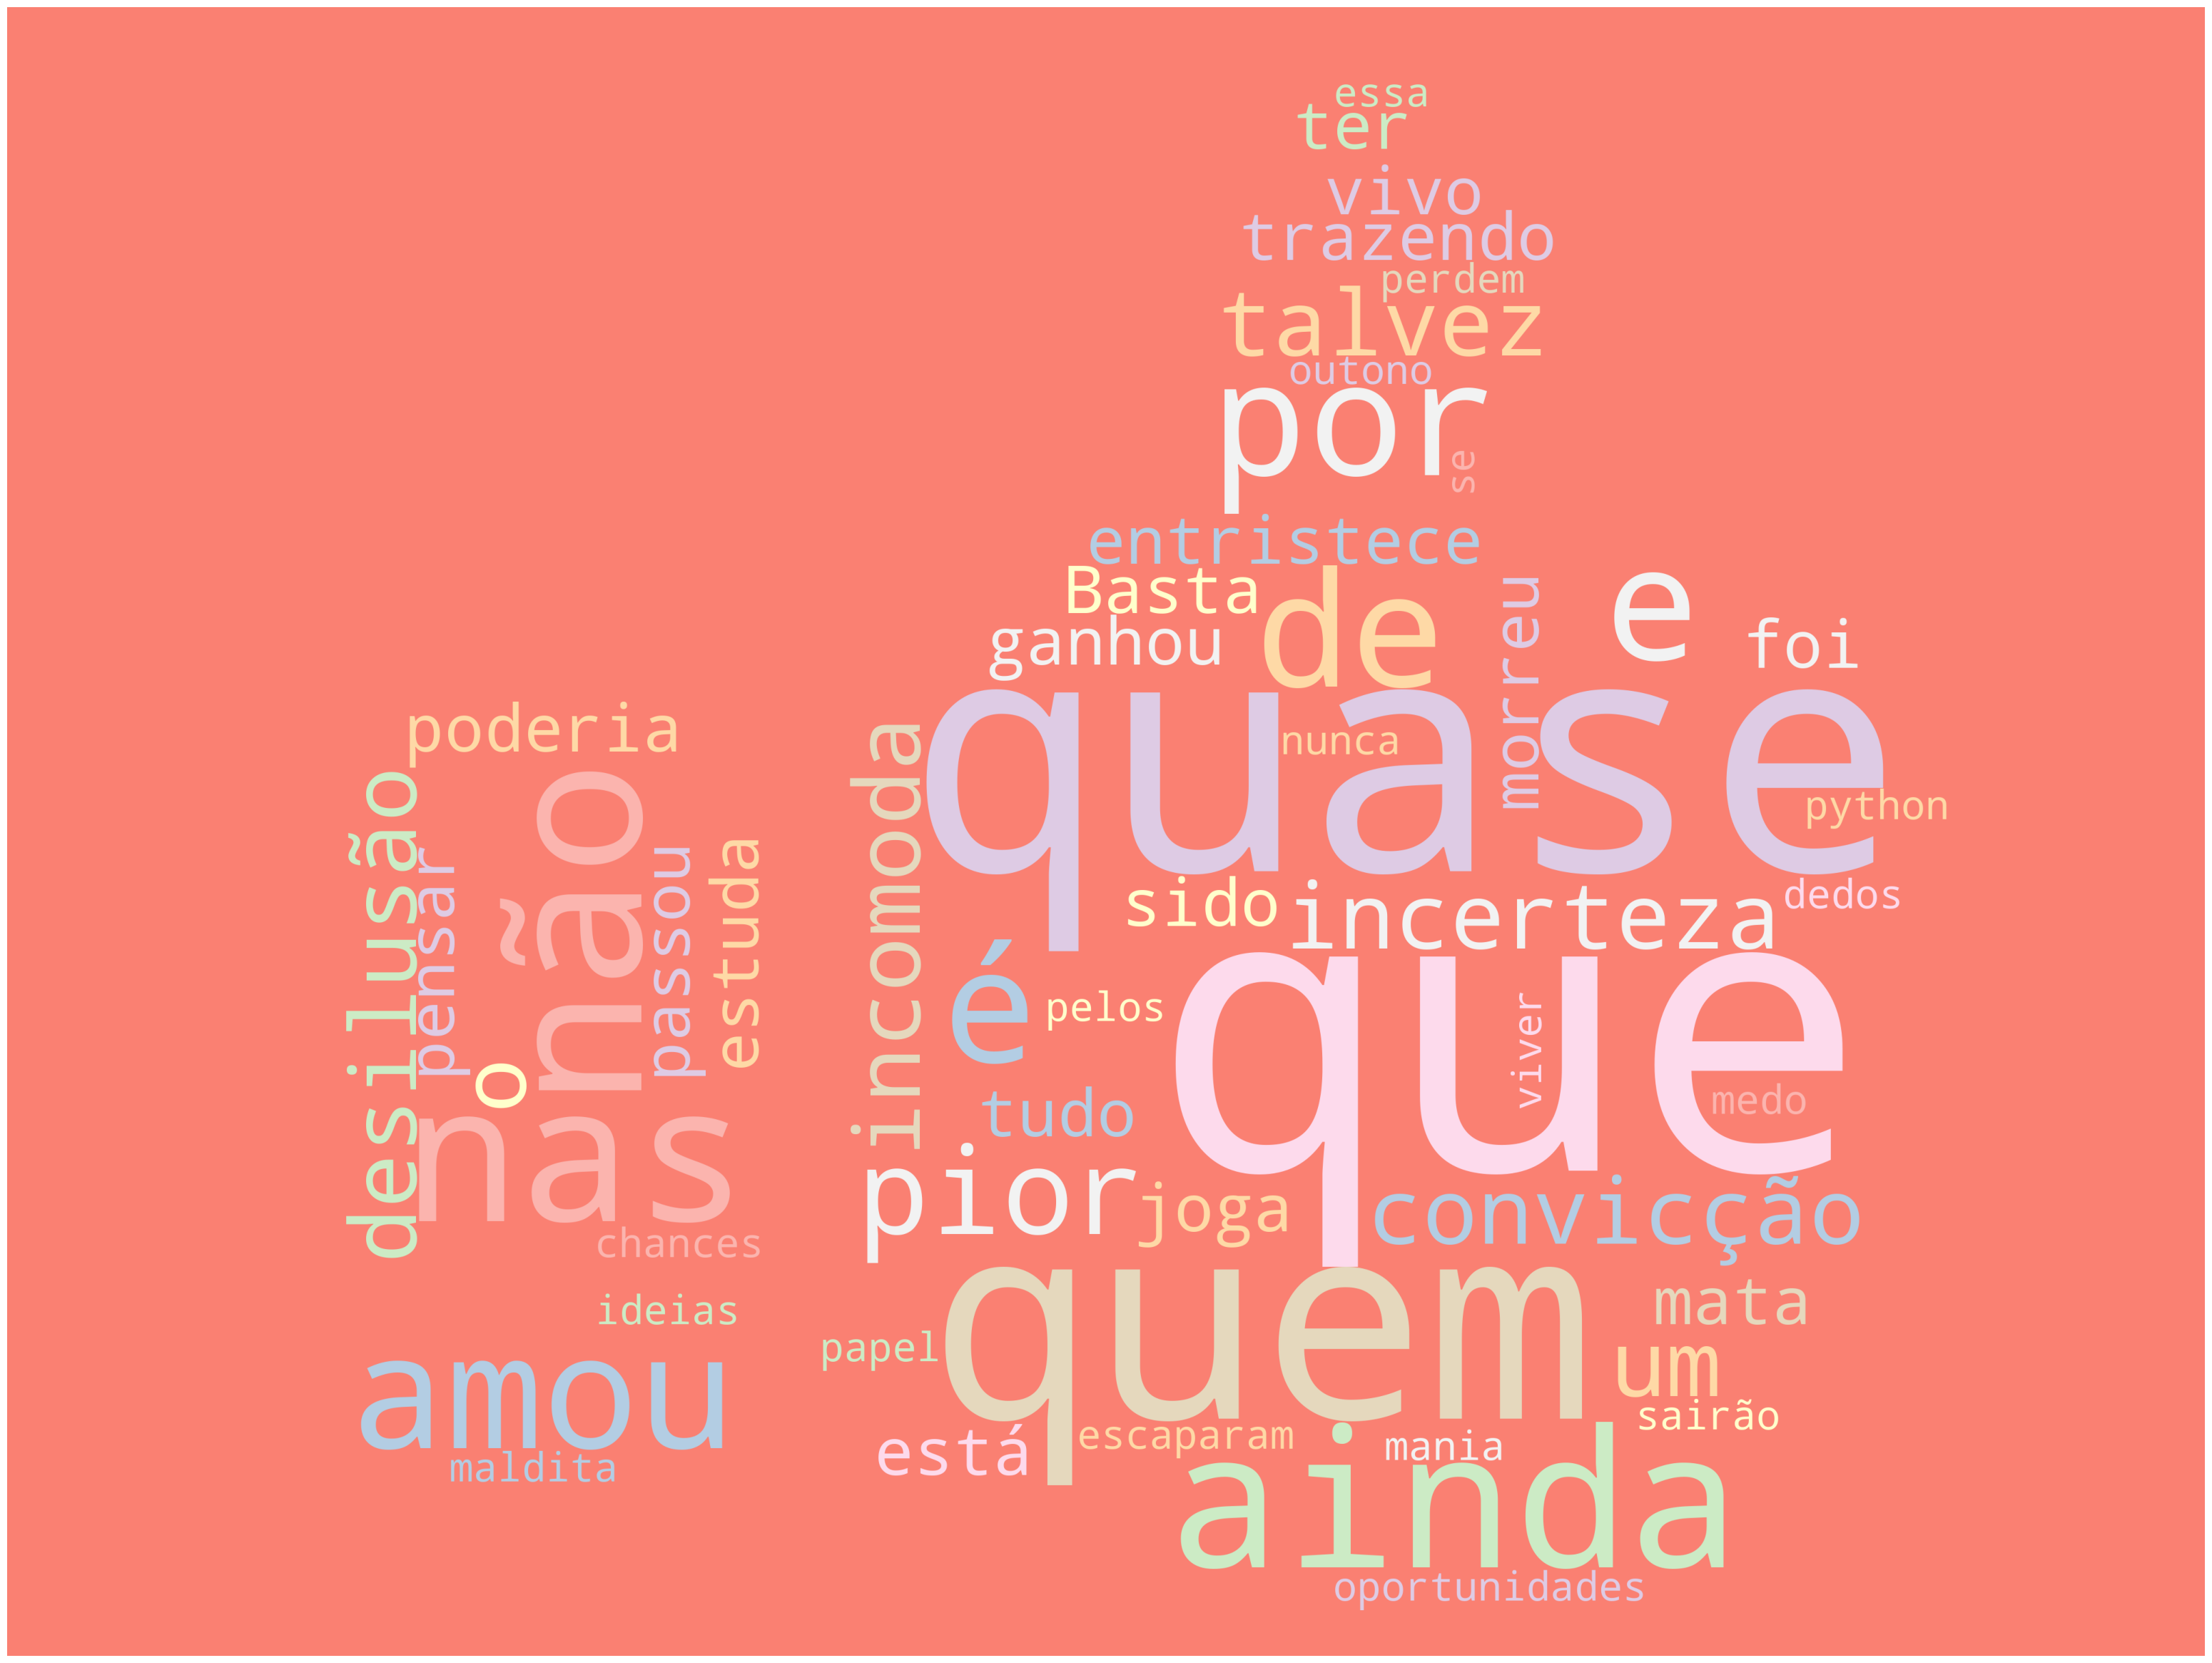

In [37]:
plot_cloud(wc2)